<a href="https://colab.research.google.com/github/sean-halpin/data_vis/blob/main/data_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("fortune500.csv")
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25500 non-null  int64  
 1   Rank                   25500 non-null  int64  
 2   Company                25500 non-null  object 
 3   Revenue (in millions)  25500 non-null  float64
 4   Profit (in millions)   25500 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 996.2+ KB


In [5]:
non_numberic_profits = df['Profit (in millions)'].str.contains('[^0-9.-]')
df_non_numeric_profits = df.loc[non_numberic_profits]
df_non_numeric_profits.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


Lets visualise how many rows per year have non numeric profits

In [8]:
df.Year.unique()

array([1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005])

(array([ 6.,  2.,  3.,  3.,  3.,  1.,  2.,  2.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  7.,  8.,  7.,  7.,  6.,  7.,  7.,  9.,  9.,  7.,
         8., 10.,  9., 11., 13., 23., 23., 20., 24., 19., 20., 21., 16.,
        16.,  6.,  6.,  4.,  3.,  3.,  4.,  3.,  4.,  5.,  1.]),
 array([1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
        1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
        1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
        1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
        1999, 2000, 2001, 2002, 2003, 2004, 2005]),
 <a list of 50 Patch objects>)

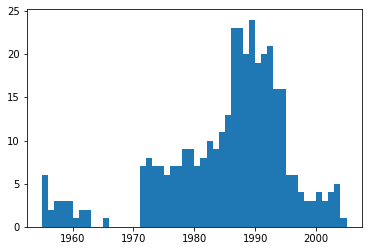

In [10]:
import matplotlib.pyplot as plt
plt.hist(df_non_numeric_profits.Year, bins=range(1955, 2005+1))

Let's remove these rows

In [11]:
df = df.loc[~non_numberic_profits]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25131 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25131 non-null  int64  
 1   Rank                   25131 non-null  int64  
 2   Company                25131 non-null  object 
 3   Revenue (in millions)  25131 non-null  float64
 4   Profit (in millions)   25131 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [12]:
df.describe()

,Year,Rank,Revenue (in millions)
count,25131.000000,25131.000000,25131.000000
mean,1979.926784,249.744777,4304.961780
std,14.764827,144.443000,11396.723687
min,1955.000000,1.000000,49.700000
25%,1967.000000,124.000000,357.900000
50%,1980.000000,250.000000,1017.600000
75%,1993.000000,375.000000,3916.100000
max,2005.000000,500.000000,288189.000000


You are required to explain what you plan on doing with the data.
 - Why did you chose the specific visualizations? 
 - Why did you choose specific observations for a visualization
 - How did you Engineer your Data? 

# Plots 
Generate a plot that details the 5 top Companies by Revenue for each Decade.
 - Top 5 for 1950-1959, 1960-1969 etc. 
 - This Must be a Single plot either static
or interactive. 

In [13]:
df['Profit (in millions)'] = df['Profit (in millions)'].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25131 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25131 non-null  int64  
 1   Rank                   25131 non-null  int64  
 2   Company                25131 non-null  object 
 3   Revenue (in millions)  25131 non-null  float64
 4   Profit (in millions)   25131 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.2+ MB


In [45]:
df['decade'] = df.apply(lambda x: int(x.Year/10)*10, axis=1)
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions),decade
0,1955,1,General Motors,9823.5,806.0,1950
1,1955,2,Exxon Mobil,5661.4,584.8,1950
2,1955,3,U.S. Steel,3250.4,195.4,1950
3,1955,4,General Electric,2959.1,212.6,1950
4,1955,5,Esmark,2510.8,19.1,1950


In [46]:
df.decade.unique()

array([1950, 1960, 1970, 1980, 1990, 2000])

In [55]:
df_decade = df.groupby(["decade","Company"], as_index=False).sum().sort_values("Profit (in millions)", ascending=False)
df_decade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4346 entries, 3902 to 4268
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   decade                 4346 non-null   int64  
 1   Company                4346 non-null   object 
 2   Year                   4346 non-null   int64  
 3   Rank                   4346 non-null   int64  
 4   Revenue (in millions)  4346 non-null   float64
 5   Profit (in millions)   4346 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 237.7+ KB


In [61]:
df_decade[['decade', 'Company', 'Revenue (in millions)',	'Profit (in millions)']].head()

,decade,Company,Revenue (in millions),Profit (in millions)
3902,2000,Exxon Mobil,1232291.0,99250.0
3819,2000,Citigroup,609631.0,87687.0
3937,2000,General Electric,785644.0,82849.0
3010,1990,Exxon Mobil,1051133.0,58080.0
3757,2000,Bank of America Corp.,318901.0,56393.0


# Distribution of Revenue

 - Plot a graph depicting the distribution of the “Revenue” in the top 20
Companies in 1971. 

# Highest Performing Companies

 - Find out and visualize which Top 10 Companies profit increased the most
between 1990 and 1999 
 - This Must be a Single plot either static or interactive. 

# Revenue by Decade 

 - Observe and plot the average revenue by decade
 - This Must be a Single plot
either static or interactive. 